In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import datetime 
import numpy as np 

import sys
sys.path.insert(0, '../../../src/CPM/')
from PertMain2 import Pert, Activity

np.random.seed(0)


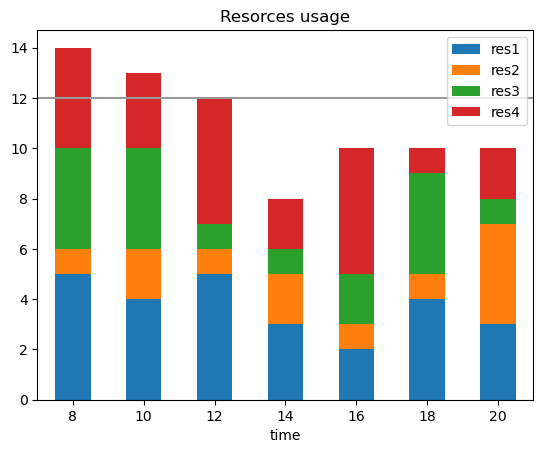

In [2]:
res_usage_raw = np.random.randint(1, 6, size=(7,4))
time_vals = np.array(['8','10','12','14','16','18','20']) 

comb_data = np.column_stack((time_vals.T, res_usage_raw))
df1 = pd.DataFrame(comb_data, columns=['time', 'res1', 'res2', 'res3', 'res4'])
df1=df1.astype(int)

df1.plot(x='time', kind='bar', stacked=True, rot=0, title='Resorces usage')

plt.axhline(y=12, color='0.6', linestyle='-')
plt.show()

In [3]:
range_date = pd.date_range(start ='1/1/2019 0:00:00', end ='1/1/2019 23:00:00',freq ='h') 
df_res = pd.DataFrame(range_date, columns =['date']) 
df_res['res1'] = np.random.randint(10, 20, size =(len(range_date)))
df_res['res2'] = np.random.randint(10, 20, size =(len(range_date)))
df_res['res3'] = np.random.randint(10, 20, size =(len(range_date)))
df_res['res4'] = np.random.randint(10, 20, size =(len(range_date)))

df_res['time'] = pd.to_datetime(df_res['date']) 
df_res = df_res.set_index('time') 
df_res.drop(['date'], axis = 1, inplace = True) 
  
print(df_res.head(10))


                     res1  res2  res3  res4
time                                       
2019-01-01 00:00:00    13    14    18    19
2019-01-01 01:00:00    13    19    14    10
2019-01-01 02:00:00    13    18    13    12
2019-01-01 03:00:00    17    11    17    17
2019-01-01 04:00:00    10    11    15    12
2019-01-01 05:00:00    11    17    15    19
2019-01-01 06:00:00    19    19    10    12
2019-01-01 07:00:00    19    19    11    13
2019-01-01 08:00:00    10    13    15    13
2019-01-01 09:00:00    14    16    19    12


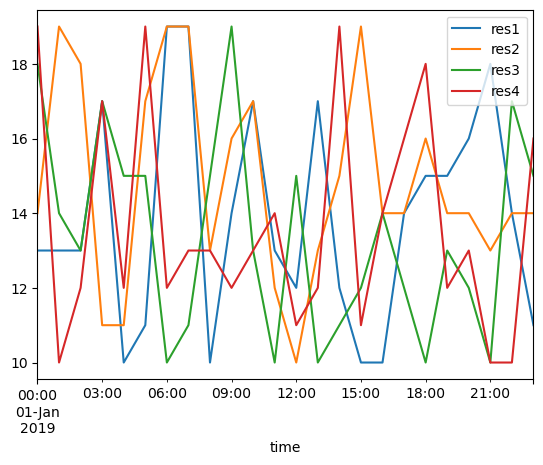

In [4]:
df_res.plot()
plt.show()

In [7]:
start = Activity("start", 1, 'res1')
a = Activity("a", 2, 'res1')
b = Activity("b", 3, 'res2')
c = Activity("c", 3, 'res3')
d = Activity("d", 4, 'res4')
e = Activity("e", 3, 'res1')
f = Activity("f", 6, 'res2')
g = Activity("g", 3, 'res3')
h = Activity("h", 6, 'res4')
end = Activity("end", 1, 'res1')

graph = {start: [a, d, f], 
         a: [b], 
         b: [c], 
         c: [g, h], 
         d: [e], 
         e: [c], 
         f: [c],
         g: [end],
         h: [end], 
         end:[]}

startT = pd.to_datetime('1/1/2019 0:00:00')

pert = Pert(graph, startTime=startT, resourcesTS=df_res)